In [1]:
import os
import numpy as np
import pandas as pd
import hickle

from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline


# Set working directory
DATA_DIR = 'C:/Users/thoma/Documents/00GitHub/rbc_cnn/'
# Set image directory which is off of GitHub
IMG_DIR = 'C:/Users/thoma/Documents/00GitHub/00_LOCAL_ONLY/Cellavision_Trial_images/Test3_AltFebruary/'


# Not sure what this pickle is
df = pd.read_pickle(DATA_DIR + 'notebooks/classifications.df.pkl')


# {1L: 'Normal', 2L: 'Abnormal'}
label_index = pd.read_csv(DATA_DIR + 'notebooks/label_index.csv')
label_index.reset_index()
classdict = {k:v for __, (k,v) in label_index.iterrows()}

data = df.reset_index()
data = data.rename(columns={'index': 'event'})


def get_image(n):
    return Image.open(IMG_DIR + 'rbcs/{}'.format(n))

def thumb(n):
	try:
		return Image.open(IMG_DIR + 'rbcs/{}'.format(n))
	except:
		return Image.open(IMG_DIR + 'mosaic/images/Normal/{}.png'.format(n))

In [2]:
# http://stackoverflow.com/questions/15514593/importerror-no-module-named-when-trying-to-run-python-script

import sys
sys.path.append('C:/Anaconda/Lib/site-packages')

import cv2
import PIL


In [4]:
# Alter the original csv file so you can get the new XY
# Start by loading in the new csv to dataframe

# csvFile = DATA_DIR + 'dataset.csv'
# classes = pd.read_csv(csvFile, index_col=0, parse_dates=True)
# read in cell labels from Cell Label Tool 
classes = pd.read_csv(DATA_DIR + 'dataset.csv', index_col=0, parse_dates=True)

#alt_february_files = pd.read_csv(DATA_DIR + 'alt_february_files.csv', index_col=0, parse_dates=True)
classes.head()

,annotator,image,label,pk,x,y
0,rick,752602451HV_001.jpg,NORMAL,11,1602,664
1,rick,752602451HV_001.jpg,NORMAL,12,1642,597
2,rick,752602451HV_001.jpg,NORMAL,13,1664,652
3,rick,752602451HV_001.jpg,NORMAL,15,1551,728
4,rick,752602451HV_001.jpg,NORMAL,16,1551,679


In [5]:
# get rid of reject cells
classes = classes[classes.label != 'Reject']
classes = classes[classes.label != 'Abnormal']
len(classes)

2218

In [6]:
# resets the index on the dataframe after the 'rejects' are dropped
classes = classes.reset_index(drop=True)
classes.head()

,annotator,image,label,pk,x,y
0,rick,752602451HV_001.jpg,NORMAL,11,1602,664
1,rick,752602451HV_001.jpg,NORMAL,12,1642,597
2,rick,752602451HV_001.jpg,NORMAL,13,1664,652
3,rick,752602451HV_001.jpg,NORMAL,15,1551,728
4,rick,752602451HV_001.jpg,NORMAL,16,1551,679


In [7]:
# counts the number of cells in each calss
classes['label'].value_counts()

NORMAL         714
Target cell    702
Schistocyte    253
Echinocyte     185
Spherocyte     100
Dacrocyte       71
Stomatocyte     68
Acanthocyte     67
Elliptocyte     58
Name: label, dtype: int64

In [84]:
len(classes)

2218

In [34]:
cell = classes.ix[23]
im = cv2.imread("C:/Users/thoma/Documents/00GitHub/00_LOCAL_ONLY/00RbcCNN_Sln_Images/752601275HV_001.jpg")
cell

annotator                   rick
image        752900792HV_001.jpg
label                 Spherocyte
pk                            70
x                           1496
y                           1708
Name: 23, dtype: object

In [35]:
cell.y

1708

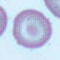

In [10]:
new_x = cell.x - 30
new_y = cell.y - 30
new_w = 60
new_h = 60

croppedCell = im[new_y:new_y+new_h, new_x:new_x+new_w]
pic = Image.fromarray(croppedCell)
pic

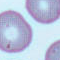

In [37]:
new_x = cell.x - 30
new_y = cell.y - 30
new_w = 60
new_h = 60

croppedCell2 = im[new_y:new_y+new_h, new_x:new_x+new_w]
pic = Image.fromarray(croppedCell2)
pic

In [11]:
croppedCell.shape

(60L, 60L, 3L)

In [81]:
# gets byte array from smear image using xywh coordinates 
def getData(ind, dataframe, im):
    # im = cv2.imread(IMG_DIR + dataframe.image[ind])
    df = dataframe.ix[ind]
    label = df.label
    
    new_x = df.x - 30
    new_y = df.y - 30
    new_w = 60
    new_h = 60

    croppedCell = im[new_y:new_y+new_h, new_x:new_x+new_w]

    if croppedCell.shape == (60, 60, 3):
        return croppedCell, label
    

In [80]:
# get array data from smear with label
# n = total number of cells 

def CreateLabelImageArrays(dataframe):
    
    # chunking counter
    i = 0
    
    # byte array
    X = []
    # label array
    Y = []
    # not sure
    IDs = []
    
    # iterates over image column of dataframe
    for n in dataframe.image.iteritems():
        
        # this is the entire index object
        index_obj = dataframe.ix[n[0]]
        
        # n[0] = index
        index = n[0]

        # get smear image array      
        im = cv2.imread(IMG_DIR + dataframe.image[index])

        try:
            # pass index, dataframe, and image array to function
            x, y = getData(index, dataframe, im)
        except Exception, e:
            #type, value, tb = sys.exc_info()
            #traceback.print_exc()
            print e
            continue

        X.append(x)
        Y.append(y)
        IDs.append(n)
        
        i += 1
        
        if i > 999:
            
            # individual cell byte arrays    
            X = np.array(X)

            # individual cell labels
            Y = np.array(Y)

            # individual cell associated smear files
            IDs = np.array(IDs)

            # create dictionary for arrays
            d = {}
            d['X'] = totalByteArray
            d['y'] = totalLabelArray
            
            # hickle counter
            hickleCount = 0
            
            # (X, Y) -- ((N,3,w,h), label)
            hickle.dump(d, open('C:/Users/thoma/Documents/00GitHub/rbc_cnn/data/April{}.hkl'.format(hickleCount),'w'))
            
            hickleCount += 1
            i = 0

In [83]:
# Get image arrays for test3 dataset
#test3_image_arrays = CreateLabelImageArrays(classes)

In [ ]:
pic = Image.fromarray(test3_image_arrays[0][4])
pic

In [ ]:
# Get image arrays for alt_february dataset
alt_february_files_arrays = CreateLabelImageArrays(alt_february_files)

In [ ]:
pic = Image.fromarray(alt_february_files_arrays[0][4])
pic

In [ ]:
# join cell byte arrays 
totalByteArray = np.concatenate((test3_image_arrays[0], alt_february_files_arrays[0]))

# join cell label arrays
totalLabelArray = np.concatenate((test3_image_arrays[1], alt_february_files_arrays[1]))

In [ ]:
# create dictionary for arrays
d = {}
d['X'] = totalByteArray
d['y'] = totalLabelArray

In [ ]:
# (X, Y) -- ((N,3,w,h), label)
hickle.dump(d, open('C:/Users/thoma/Documents/00GitHub/00_LOCAL_ONLY/rbc_cnn_sync/data/dataset_february.hkl','w'))

In [112]:
hk0 = hickle.load('C:/Users/thoma/Documents/00GitHub/rbc_cnn/data/April0.hkl')
hk1 = hickle.load('C:/Users/thoma/Documents/00GitHub/rbc_cnn/data/April1.hkl')
hk2 = hickle.load('C:/Users/thoma/Documents/00GitHub/rbc_cnn/data/April2.hkl')
hk3 = hickle.load('C:/Users/thoma/Documents/00GitHub/rbc_cnn/data/April3.hkl')
hk4 = hickle.load('C:/Users/thoma/Documents/00GitHub/rbc_cnn/data/April4.hkl')
hk5 = hickle.load('C:/Users/thoma/Documents/00GitHub/rbc_cnn/data/April5.hkl')
hk6 = hickle.load('C:/Users/thoma/Documents/00GitHub/rbc_cnn/data/April6.hkl')
hk7 = hickle.load('C:/Users/thoma/Documents/00GitHub/rbc_cnn/data/April7.hkl')

In [113]:
# join cell byte arrays 
totalByteArray = np.concatenate((hk0['X'], hk1['X'], hk2['X'], hk3['X'], hk4['X'], hk5['X'], hk6['X'], hk7['X']))

# join cell label arrays
totalLabelArray = np.concatenate((hk0['y'], hk1['y'], hk2['y'], hk3['y'], hk4['y'], hk5['y'], hk6['y'], hk7['y']))

In [117]:
len(totalByteArray)

2208

In [116]:
testDict['y'][264]

'Target cell'

In [118]:
# create dictionary for arrays
d = {}
d['X'] = totalByteArray
d['y'] = totalLabelArray

In [119]:
# (X, Y) -- ((N,3,w,h), label)
hickle.dump(d, open('C:/Users/thoma/Documents/00GitHub/rbc_cnn/data/TotalHickle.hkl','w'))